In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('quasar_train.csv')

In [3]:
df.head()

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


In [4]:
x = np.array([x for x in df.columns], dtype=int)
y = df.loc[0, :].values

In [5]:
x = np.array([np.ones(x.shape[0]), x]).T

In [6]:
theta = np.linalg.inv(x.T@x)@x.T@y

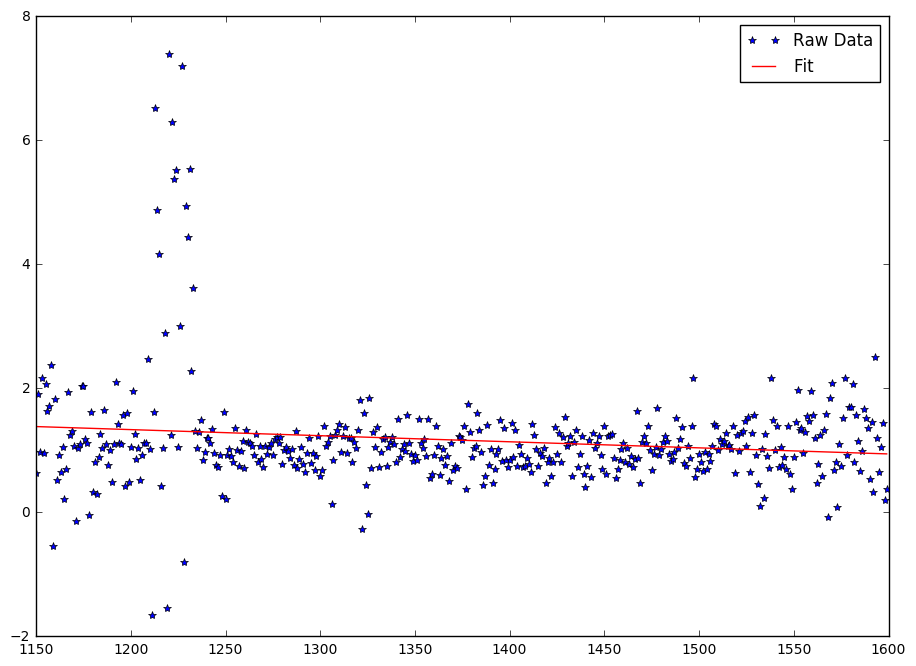

In [7]:
plt.figure(figsize=(11, 8))
raw_data, = plt.plot(x[:, 1], y, '*', label='Raw Data')
fit_line, = plt.plot(x[:, 1], theta[0] + theta[1] * x[:,1], '-r', label='Fit Line')
plt.legend([raw_data, fit_line], ['Raw Data', 'Fit'])

In [8]:
def get_weights_matrix(x, atu):
    x = x.reshape(-1, 1)
    y = x.T
    diff = x - y
    return np.exp(np.square(diff) / (2 * atu^2))

In [9]:
np.exp(- np.square( - np.array([1,2,3])))

array([  3.67879441e-01,   1.83156389e-02,   1.23409804e-04])

In [10]:
def locally_weighted_linear_regression(x, y, atu):
    num_samples = x.shape[0]
    x_with_ones = np.array([np.ones(x.shape[0]), x]).T
    y_smooth = np.zeros(num_samples)
    for i in range(num_samples):
        weights = np.diag(np.exp(- np.square(x[i] - x) / (2 * atu**2)))
        theta = np.linalg.inv(x_with_ones.T@weights@x_with_ones)@x_with_ones.T@weights@y
        y_smooth[i] = x_with_ones[i]@theta
    return y_smooth

In [11]:
x = np.array([x for x in df.columns], dtype=int)
y = df.loc[0, :].values

In [12]:
smooth_y = locally_weighted_linear_regression(x, y, 5)

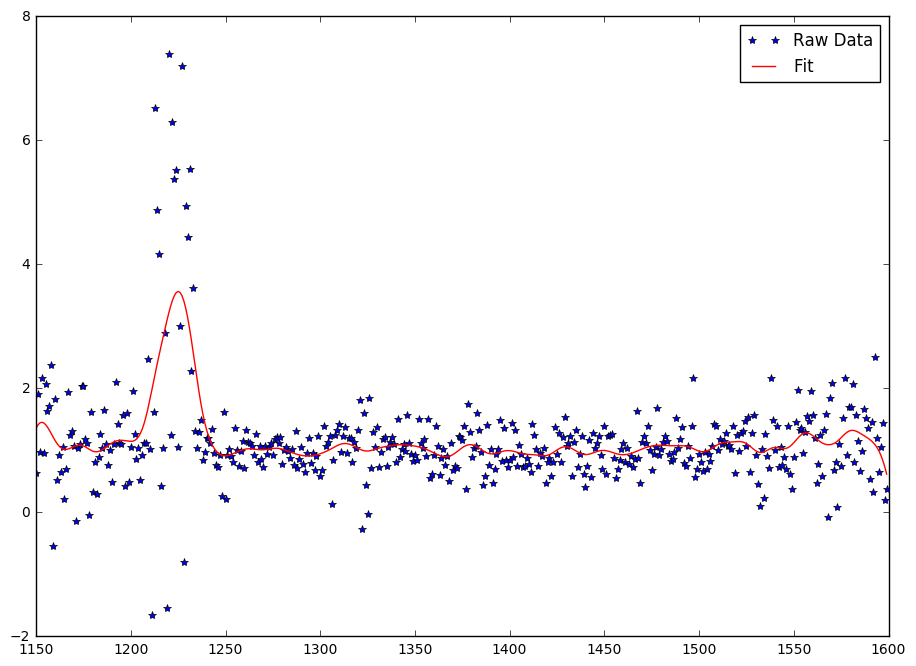

In [13]:
plt.figure(figsize=(11, 8))
raw_data, = plt.plot(x, y, '*', label='Raw Data')
fit_line, = plt.plot(x, smooth_y, '-r', label='Smooth Y')
plt.legend([raw_data, fit_line], ['Raw Data', 'Fit'])

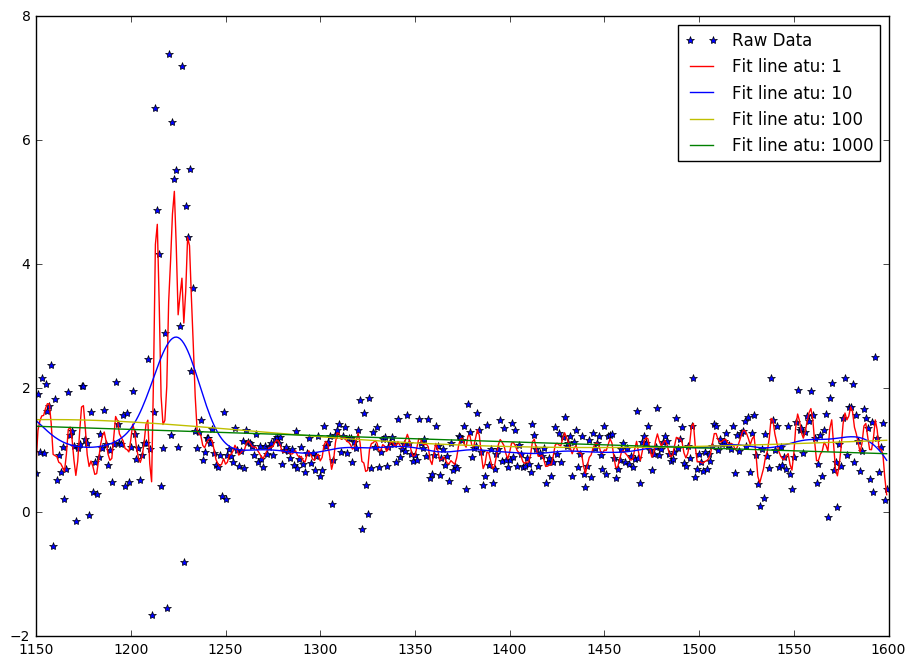

In [14]:
plt.figure(figsize=(11, 8))
raw_data, = plt.plot(x, y, '*', label='Raw Data')
figs = [raw_data]
for atu, col in zip([1, 10, 100, 1000], ['r', 'b', 'y', 'g']):
    smooth_y = locally_weighted_linear_regression(x, y, atu)
    fig, = plt.plot(x, smooth_y, '-'+col, label='Smooth Y {}'.format(atu))
    figs.append(fig)
plt.legend(figs, ['Raw Data'] + ['Fit line atu: {}'.format(atu) for atu in [1, 10, 100, 1000]])

Smooth Data

In [15]:
smooth_training_set = df.apply(lambda row: locally_weighted_linear_regression(x, row.values, 5), axis=1)

In [16]:
smooth_training_set.head()

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,1.354578,1.411428,1.444183,1.454483,1.444648,1.417679,1.377181,1.327194,1.271964,1.215665,...,1.177875,1.153110,1.123592,1.087366,1.042372,0.986544,0.917909,0.834687,0.735374,0.618808
1,0.863030,0.934992,0.987481,1.024020,1.048026,1.062757,1.071234,1.076121,1.079601,1.083260,...,1.152844,1.144768,1.134039,1.116679,1.088010,1.042846,0.975691,0.880942,0.753086,0.586869
2,-0.541991,-0.387919,-0.237598,-0.094958,0.037007,0.156429,0.262619,0.355977,0.437780,0.509873,...,0.990094,0.992039,1.001164,1.017772,1.041702,1.072248,1.108119,1.147456,1.187883,1.226617
3,0.315311,0.350667,0.399682,0.457496,0.520002,0.583942,0.646924,0.707364,0.764344,0.817449,...,1.016987,1.037521,1.064515,1.097674,1.136054,1.178049,1.221415,1.263298,1.300281,1.328453
4,0.557010,0.719105,0.844582,0.937089,1.001121,1.041749,1.064305,1.074050,1.075866,1.074013,...,1.359554,1.340186,1.317625,1.290164,1.255991,1.213389,1.160878,1.097299,1.021835,0.933995


In [17]:
test_df = pd.read_csv('quasar_test.csv')

In [18]:
smooth_test_set = test_df.apply(lambda row: locally_weighted_linear_regression(x, row.values, 5), axis=1)

In [76]:
training_left = smooth_training_set.ix[:, :50]
training_right = smooth_training_set.ix[:, 150:]

test_left = smooth_test_set.ix[:, :50]
test_right = smooth_test_set.ix[:, 150:]

In [77]:
def kernel(x):
    return np.maximum(1-x, 0)

def estimate_lambda_alpha_forest(weights, x):
    return weights.reshape(-1, 1).T @ x

def get_closest_k_elements(data, target, k=3):
    distances = np.sum(np.square(target - data), axis=1)
    min_idx = [x for x in np.argpartition(distances, k+1)[:k+1] if x != i]
    min_distances = distances[min_idx]
    h = max(distances)
    return min_idx, min_distances, h

def get_errors(right_data, left_data, k):
    total_errors = 0
    estimated_forest = []
    for i,  j in enumerate(right_data):
        min_idx, min_distances, h = get_closest_k_elements(right_data, i, k)
        kernels = kernel(min_distances/h)
        weights = kernels / np.sum(kernels)
        weighted_left = estimate_lambda_alpha_forest(weights, left_data[min_idx])
        errors = np.sum(np.square(left_data[i] - weighted_left))
        total_errors += errors
        estimated_forest.append(weighted_left)
    average_errors = total_errors / len(left_data)
    return average_errors, estimated_forest

In [78]:
average_training_errors, estimated_forest = get_errors(training_right.values, training_left.values, 3)

In [79]:
average_test_errors, estimated_test_forest = get_errors(test_right.values, test_left.values, 3)

In [80]:
average_training_errors

2.0985173772567212

In [81]:
average_test_errors

4.2130861503024928